# Lab 7.05 - Time series analysis

In [1]:
# Package imports
# Package imports
# Package imports for data science and time series analysis in particular
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe
import scipy.stats as stats                         # Statistical tests

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced dataviz

from sklearn.linear_model import LinearRegression   # Linear regression model

# Time series analysis
from datetime import datetime
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

### Exercise 5 - Alcoholic beverages sales

The file US Retail.csv contains monthly retail sales of beer, wine, and liquor at U.S. liquor stores.

- Is seasonality present in these data?
- Create a time series chart of the data. Based on what you see, which of the exponential smoothing models do you think should be used for forecasting? Why?
- Split the dataset in a train (1992-01-01 up to and including 2008-12-01) and test set (2009-01-01 up to and including 2009-12-01)  
- Create and train the model. 
- Predict the values for 2009.
- Create a plot with the train data, the fitted values, the test data and the predicted values.
- Calculate MAE

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/US%20Retail.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()

,Total Sales
Month,
1992-01-01,1519
1992-02-01,1551
1992-03-01,1606
1992-04-01,1686
1992-05-01,1834


### Stap 2: Visualiseer de tijdreek

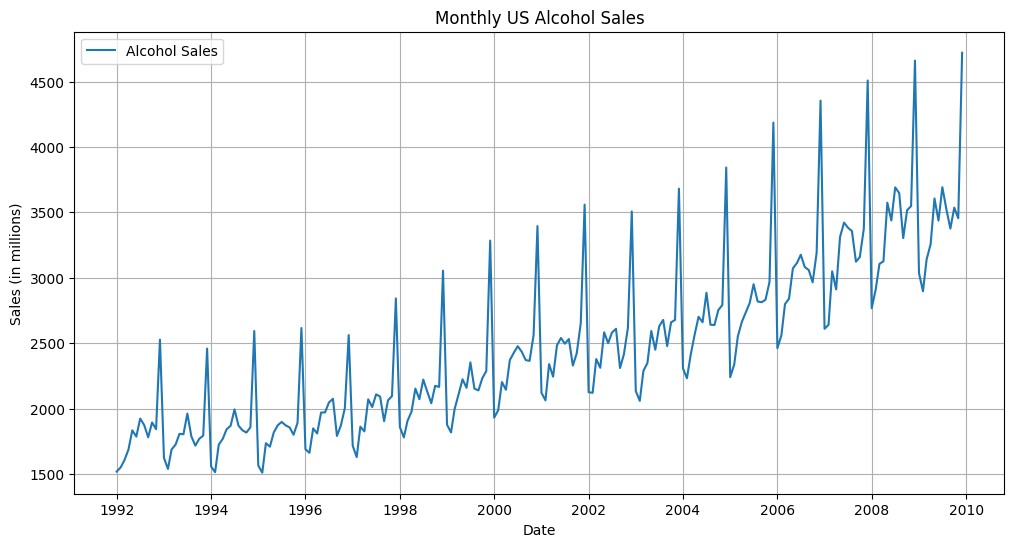

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(data, label='Alcohol Sales')
plt.title('Monthly US Alcohol Sales')
plt.xlabel('Date')
plt.ylabel('Sales (in millions)')
plt.grid(True)
plt.legend()
plt.show()


### Stap 3: Split data in train/test sets

In [4]:
# Split data
train = data[:'2008-12-01']
test = data['2009-01-01':'2009-12-01']


 ### Stap 4: Model trainen op de trainingsdata

In [5]:
model = ExponentialSmoothing(
    train['Total Sales'], 
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit()


c:\Users\Jamie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Stap 5: Voorspel waarden voor 2009

In [6]:
forecast = model.forecast(12)


### Stap 6: Plot alles samen

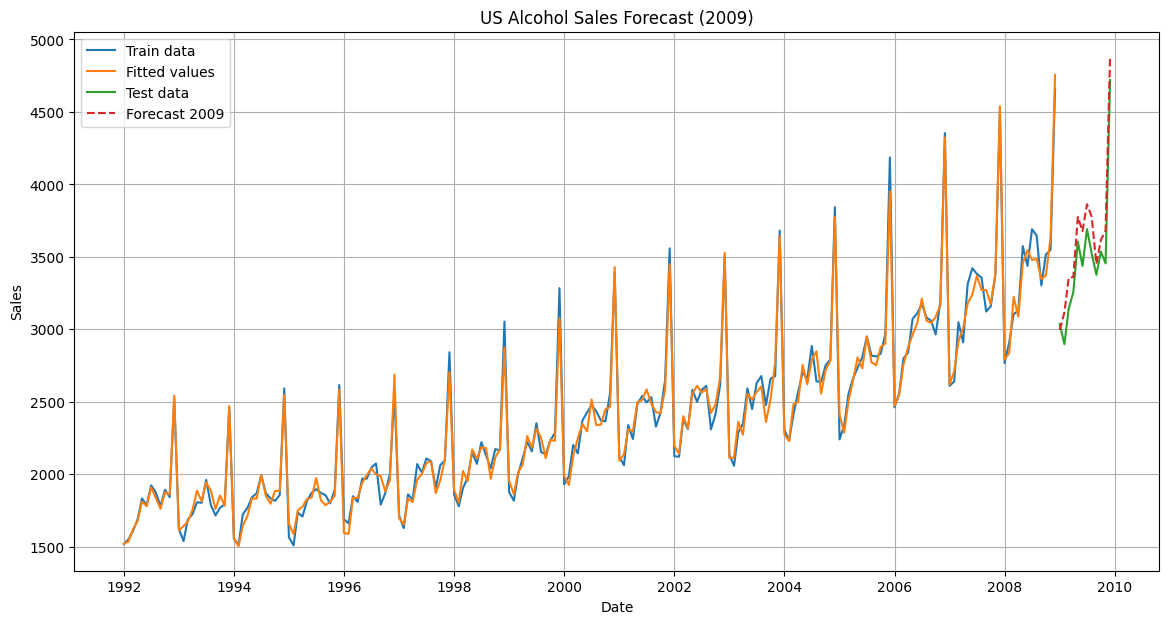

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(train, label='Train data')
plt.plot(model.fittedvalues, label='Fitted values')
plt.plot(test, label='Test data')
plt.plot(forecast, label='Forecast 2009', linestyle='--')
plt.title('US Alcohol Sales Forecast (2009)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


### Stap 7: Bereken MAE (Mean Absolute Error)

In [17]:
mae = mean_absolute_error(test['Total Sales'], forecast)
print(f"MAE voor 2009 voorspelling: {mae:.2f}")

MAE voor 2009 voorspelling: 163.31


## Source
Business Analytics Data Analysis & Decision Making 



---

##  Stap 1: Laad de data in

Gebruik `read_csv()` en zet 'Month' als tijdindex.

---

##  Stap 2: Visualiseer de tijdreeks

Bekijk de grafiek en stel jezelf 2 vragen:

- Is er een **trend**?  Ja
- Is er **seizoensinvloed**?  Ja (regelmatige pieken en dalen)

---

##  Stap 3: Kies het model

Gebruik **Triple Exponential Smoothing (Holt-Winters)**:
- `trend='add'` (stabiele, lineaire stijging)
- `seasonal='add'` (gelijke seizoenspieken)
- `seasonal_periods=12` (maandelijkse data → jaarlijks patroon)

---

##  Stap 4: Split de data

- Train: van januari 1992 t.e.m. december 2008
- Test: van januari 2009 t.e.m. december 2009

---

##  Stap 5: Train het model

Gebruik `ExponentialSmoothing()` met `.fit()` op de trainingsset.

---

##  Stap 6: Voorspel voor 12 maanden

Gebruik `.forecast(12)` om 1 jaar vooruit te voorspellen.

---

##  Stap 7: Maak een duidelijke grafiek

Toon:
- Train data
- Fitted values
- Test data
- Voorspelling

---

##  Stap 8: Evalueer met MAE

Gebruik:
```python
mean_absolute_error(test['Alcohol'], forecast)
